In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading data
df = pd.read_csv("./kaggle_Interests_group.csv")
df.tail()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
6339,I,66,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [3]:
#filling NAN values with 0 and saving it to df
df.fillna(0, inplace=True)

In [4]:
#taking interest_1 - interest_217 columns as input features
X = df.iloc[:, 2:].values

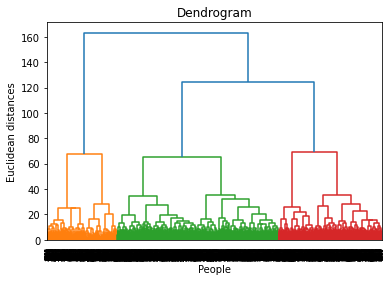

In [5]:
#visualizing dendogram and choosing number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('People')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
#from dendogram we can conclude that K=3 is good option (K=number of clusters)
#for large datasets it is not recommended to use Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = model.fit_predict(X)

In [7]:
#for visualization purpose we will have to reduce out 217-dimention data to somewhat 2 or 3 dimension 
#for dimensionality reduction we will use principal component analysis method

from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

In [8]:
#converting X of 217-dimension to Z of 2-dimension and 3-dimension
Z_2d = pca_2d.fit_transform(X)
Z_3d = pca_3d.fit_transform(X)

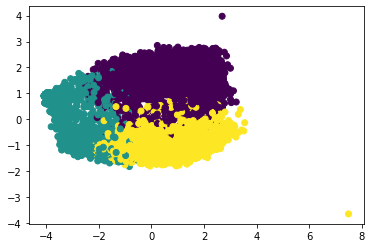

In [9]:
plt.scatter(Z_2d[:, 0], Z_2d[:, 1], c=y_pred)

<IPython.core.display.Javascript object>


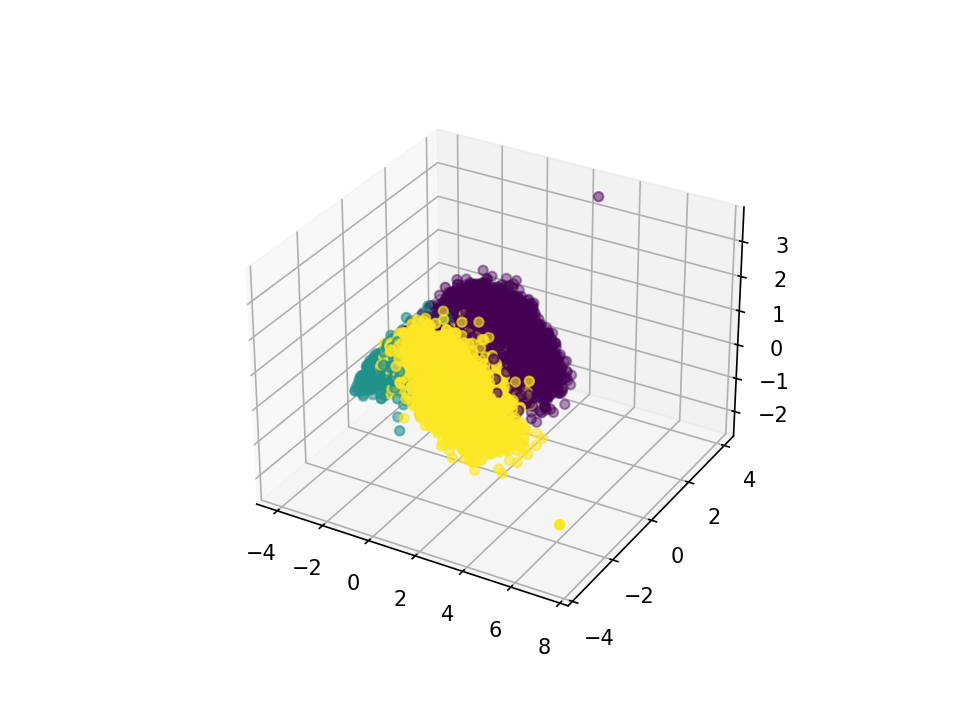

In [10]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_3d[:, 0], Z_3d[:, 1], Z_3d[:, 2], c=y_pred)
plt.show()